In [ ]:
! git clone https://github.com/matteobreschi/bajes.git

In [ ]:
!pip install pycbc lalsuite ligo-common
!pip install gwpy

import gwpy
from gwpy.timeseries import TimeSeries

In [ ]:
%cd bajes
! ls
! python setup.py install

In [3]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from bajes.obs.gw import Series
from bajes.obs.gw import Noise
from bajes.obs.gw.utils import read_asd


In [4]:
time_of_event = 1126259462

post_trigger_duration =4
duration = 8
analysis_start = time_of_event + post_trigger_duration - duration

# Use gwpy to fetch the open data
H1_analysis_data = TimeSeries.fetch_open_data(
    "H1", analysis_start, analysis_start + duration, sample_rate=4096, cache=True)

t = H1_analysis_data.times
strain = H1_analysis_data.value

# set the data properties coherently
seglen = 8           # duration of the segment [s]
srate  = 4096         # sampling rate [Hz]
t_gps  = 1126259462   # central value of GPS time
f_max  = 1024
f_min  = 20 

series = Series('time', strain, seglen=seglen, srate=srate, t_gps=t_gps, f_min=f_min, f_max=f_max)

from bajes.obs.gw import Noise
from bajes.obs.gw.utils import read_asd

fr_asd, asd = read_asd('GW150914', 'H1')
noise       = Noise(fr_asd, asd, f_min=0, f_max=f_max)

from bajes.obs.gw import Detector, Waveform

wave  = Waveform(series.freqs, srate, seglen, 'NRPM')

In [8]:
#easily figure out chirp mass and mass ratio of differing solar masses
import math

m1 = 2
m2 = 1.4

chirp_mass = (math.pow((m1 * m2), (3/5))) / (math.pow((m1 + m2), (1/5)))
q = m1 / m2  #m1 has to be the bigger number

print(chirp_mass)
print(q)

1.4521083923341433
1.4285714285714286


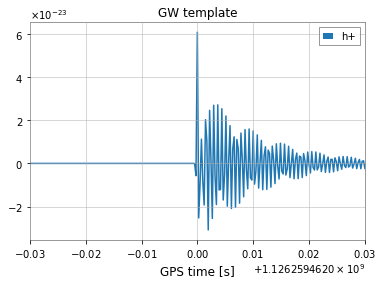

In [12]:
params = {'mchirp'     : 1.4521083923341433,    # chirp mass [solar masses] 
          'q'          : 1.4285714285714286,      # mass ratio 
          's1x'        : 0.,      # primary spin parameter, x component
          's1y'        : 0.,      # primary spin parameter, y component
          's1z'        : 0.,      # primary spin parameter, z component
          's2x'        : 0.,      # secondary spin parameter, x component
          's2y'        : 0.,      # secondary spin parameter, y component
          's2z'        : 0.,      # secondary spin parameter, z component
          'lambda1'    : 400,    # primary tidal parameter 
          'lambda2'    : 400 ,    # secondary tidal parameter
          'distance'   : 380.,    # distance [Mpc]
          'iota'       : np.pi,   # inclination [rad]
          'ra'         : 1.7,     # right ascension [rad]
          'dec'        : -0.75,   # declination [rad]
          'psi'        : 0.,      # polarization angle [rad]
          'time_shift' : 0.419,   # time shift from GPS time [s]
          'phi_ref'    : 0.,      # phase shift [rad]
          'f_min'      : 20.,     # minimum frequency [Hz]
          'srate'      : srate,   # sampling rate [Hz]
          'seglen'     : seglen,  # segment duration [s] 
          'tukey'      : 0.1,     # parameter for tukey window 
          't_gps'      : t_gps }  # GPS trigger time 


hpc = wave.compute_hphc(params)

plt.title('GW template')
plt.plot(series.times, hpc.plus, label = 'h+')
plt.xlabel('GPS time [s]')
plt.xlim((t_gps-0.03, t_gps+0.03))
plt.legend()
